<img src="Images/airplane.jpeg" alt="Aircraft in Flight" width="800">


# Project Goal
This project aims to analyze aviation accident data to identify **low-risk aircraft models** that the company should consider purchasing for its new aviation venture.

## Overview
This analysis examines aviation accident data from 1962 to 2023, covering civil aviation incidents in the United States and international waters. By exploring accident trends, aircraft models and flight phases where incidents are most frequent,the company can make informed decisions on acquiring aircraft that present the least operational risk.

The insights from this project will guide the company in selecting the safest and most reliable aircraft, ensuring smooth business operations and mitigating potential risks.

## 1. Business Problem

As the company expands into the aviation industry, it seeks to invest in aircraft for both commercial and private use. However, with limited knowledge of aircraft-related risks, it needs data-driven insights to determine which models are the safest and most suitable for its operations.

This analysis focuses on identifying low-risk airplanes by addressing the following key questions:

1️⃣ How are accidents distributed across different aircraft models?(*Which aircraft models have the lowest accident rates?*)

2️⃣ How reliable are different aircraft models over time? (*Are certain aircraft models consistently involved in accidents over multiple years?*)

3️⃣ How severe are accidents across different aircraft models?(*Which models have the least severe accidents?*)

By answering these questions, the company will gain crucial insights into aircraft safety, reliability, and operational risks. This information will help minimize potential liabilities, reduce operational disruptions, and protect the company’s reputation as it enters the aviation market.

## 2. Data Understanding
The data source of this analysis is from the CSV file 'Aviation_Data.csv' pulled from NTSB that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

This dataset contains records(rows) that represents each aircraft accident event over the period of time.

The features total to 31, showing the details of each aircraft event such as the date of the accident, model and make of the aircraft, type of aircraft, injury severity and fatalities, weather conditions e.t.c

The target variables for this analysis will be the aircraft model in relation to the number of flight accidents, the flight phases for the accidents, the severity of the accidents in relation to the aircrafte make and model.

The data requires cleaning which shall be handled appropriately making it viable for use in our analysis.

In [2]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#Loading dataset
df = pd.read_csv('Aviation_Data.csv', encoding = 'latin-1')

#Accessing the first 5 rows of the dataframe
df.head()

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#Dataframe Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Converting the dates column to datetime type

In [5]:
#Converting Event.Date column to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], format = '%Y-%m-%d')
#Converting Publication.Date column to datetime format
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], format = '%d-%m-%Y')

In [6]:
#Checking the data types of the columns
df.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

## 3. Data Preparation

### Data Cleaning
To answer the questions for this analysis, the data requires cleaning of missing values by applying the various methods to drop, replace or keep the values.

First is identifying the amount of missing data in each column.

In [7]:
#Identifying missing values for each column in relation to the entire dataset
df.isna().mean().sort_values(ascending = False)

Schedule                  0.860738
Air.carrier               0.815735
FAR.Description           0.645559
Aircraft.Category         0.642637
Longitude                 0.619549
Latitude                  0.619449
Airport.Code              0.443828
Airport.Name              0.415704
Broad.phase.of.flight     0.316819
Publication.Date          0.184719
Total.Serious.Injuries    0.154613
Total.Minor.Injuries      0.148227
Total.Fatal.Injuries      0.142339
Engine.Type               0.094479
Report.Status             0.086776
Purpose.of.flight         0.084684
Number.of.Engines         0.083488
Total.Uninjured           0.081585
Weather.Condition         0.065868
Aircraft.damage           0.051501
Registration.Number       0.030726
Injury.Severity           0.027217
Country                   0.018650
Amateur.Built             0.017278
Model                     0.017167
Make                      0.016846
Location                  0.016724
Event.Date                0.016149
Accident.Number     

### Dropping columns
The 'Schedule' column is missing 86% of its data, hence it is best to drop the entire column.

In [8]:
#Dropping the schedule column from the dataframe
df = df.drop('Schedule', axis = 1)
#Checking for other remaining null values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: int64

### Dropping rows
The missing data from the 'Model' and 'Make' column is significantly low hence we can drop the rows with null values without much affecting the data as these columns are ideal for our analysis

In [9]:
#Dropping rows with missing values in 'Model' column
df.dropna(subset = ['Model'], inplace = True)
#Dropping rows with missing values in 'Make' column
df.dropna(subset = ['Make'], inplace = True)
#Asserting no missing values left in the 'Make' and 'Model' columns
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54430
Longitude                 54439
Airport.Code              38564
Airport.Name              36031
Injury.Severity             979
Aircraft.damage            3172
Aircraft.Category         56532
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7006
FAR.Description           56841
Purpose.of.flight          6138
Air.carrier               72168
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          15224
dtype: int64

## Replacing Missing Values
The 'Amateur.Built' column consists of categorical data of two types of values hence best to replace it with the mode as there is a few missing data.

In [10]:
#Replacing null values with the mode
df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0], inplace = True)
assert df['Amateur.Built'].isna().sum()==0

For continuous data the best option would be replacing the missing data with the mean of the column.

In [11]:
#Replacing missing values with the mean to the nearest whole number
df['Number.of.Engines'].fillna(round(df['Number.of.Engines'].mean()), inplace = True)
df['Total.Fatal.Injuries'].fillna(round(df['Total.Fatal.Injuries'].mean()), inplace=True)
df['Total.Serious.Injuries'].fillna(round(df['Total.Serious.Injuries'].mean()), inplace = True)
df['Total.Minor.Injuries'].fillna(round(df['Total.Minor.Injuries'].mean()), inplace = True)
df['Total.Uninjured'].fillna(round(df['Total.Uninjured'].mean()), inplace = True)

#Check for remaining null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54430
Longitude                 54439
Airport.Code              38564
Airport.Name              36031
Injury.Severity             979
Aircraft.damage            3172
Aircraft.Category         56532
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                7006
FAR.Description           56841
Purpose.of.flight          6138
Air.carrier               72168
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          15224
dtype: int64

## Keep missing values
Since the remaining missing values are in categorical data and provide valuable insights for analysis. The best approach is to keep them by replacing null values with the string 'missing' to indicate the absence of data.

In [12]:
#Replacing the rest of the null values in the dataframe with the string missing
df.fillna('missing', inplace=True)
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

## Column Combination
Step 1 : Changing all Make and Models to uppercase to avoid duplicate values due to format

In [13]:
#Function that changes values to uppercase
def uppercase_strings(x):
    if isinstance(x, str):
        return x.upper()
    return x

#Apply lowercase_strings function to the columns
df[['Make', 'Model']] = df[['Make','Model']].applymap(uppercase_strings)
df[['Make', 'Model']]

,Make,Model
0,STINSON,108-3
1,PIPER,PA24-180
2,CESSNA,172M
3,ROCKWELL,112
4,CESSNA,501
...,...,...
90343,PIPER,PA-28-151
90344,BELLANCA,7ECA
90345,AMERICAN CHAMPION AIRCRAFT,8GCBC
90346,CESSNA,210N


Step 2: Combining the two columns to make one

In [14]:
df['Make_Model'] = df ['Make'] + ',' + df['Model']
df['Make_Model']

0                           STINSON,108-3
1                          PIPER,PA24-180
2                             CESSNA,172M
3                            ROCKWELL,112
4                              CESSNA,501
                       ...               
90343                     PIPER,PA-28-151
90344                       BELLANCA,7ECA
90345    AMERICAN CHAMPION AIRCRAFT,8GCBC
90346                         CESSNA,210N
90347                     PIPER,PA-24-260
Name: Make_Model, Length: 88777, dtype: object

## 4. Data Analysis

### a.) Accident Distribution by Make_Model
To address the first key question:

*How are accidents distributed across different aircraft models? (**Which aircraft models have the lowest accident rates?**)*

First we start by filtering the dataset to focus on airplanes and calculating the number of accidents recorded for each Make_Model. This helps in identifying patterns and trends in accident occurences across different aircraft models. 

Finally we will determine which models have the **lowest accident rates**, providing valuable insights into the safest options for the company's investment. 

In [15]:
#Identifying rows whose aircraft category is airplane
Airplane_df = df[df['Aircraft.Category'] == 'Airplane']
Airplane_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,missing,missing,...,Air Canada,1.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,2017-09-19 00:00:00,"MCDONNELL DOUGLAS,DC9"
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,missing,missing,missing,BLACKBURN AG STRIP,...,missing,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01 00:00:00,"CESSNA,140"
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,missing,missing,N58,HANOVER,...,missing,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982-01-01 00:00:00,"CESSNA,401B"
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,missing,missing,missing,missing,...,missing,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,1983-01-02 00:00:00,"BELLANCA,17-30A"
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,missing,missing,T72,HEARNE MUNICIPAL,...,missing,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,1983-01-02 00:00:00,"CESSNA,R172K"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,missing,0.0,0.0,0.0,1.0,missing,missing,missing,2022-12-14 00:00:00,"PIPER,PA42"
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,missing,missing,2022-12-27 00:00:00,"CIRRUS DESIGN CORP,SR22"
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,missing,0.0,0.0,0.0,1.0,missing,missing,missing,2022-12-19 00:00:00,"SWEARINGEN,SA226TC"
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,missing,missing,2022-12-23 00:00:00,"CESSNA,R172K"


In [16]:
#Counts of accidents per model
Airplane_df['Make_Model'].value_counts()

CESSNA,172                                    867
CESSNA,152                                    450
BOEING,737                                    404
CESSNA,182                                    345
CESSNA,172N                                   315
                                             ... 
BEECH,BE-65 (LF-23F)                            1
EVEKTOR AEROTECHNIK AS,SPORTSTAR                1
AEROS,VENTURE                                   1
HARGROVE,HUMMEL ULTRA CRUISER                   1
CONSTRUCCIONES AERONAUTICAS,C.A.S.A. 1.131      1
Name: Make_Model, Length: 7493, dtype: int64

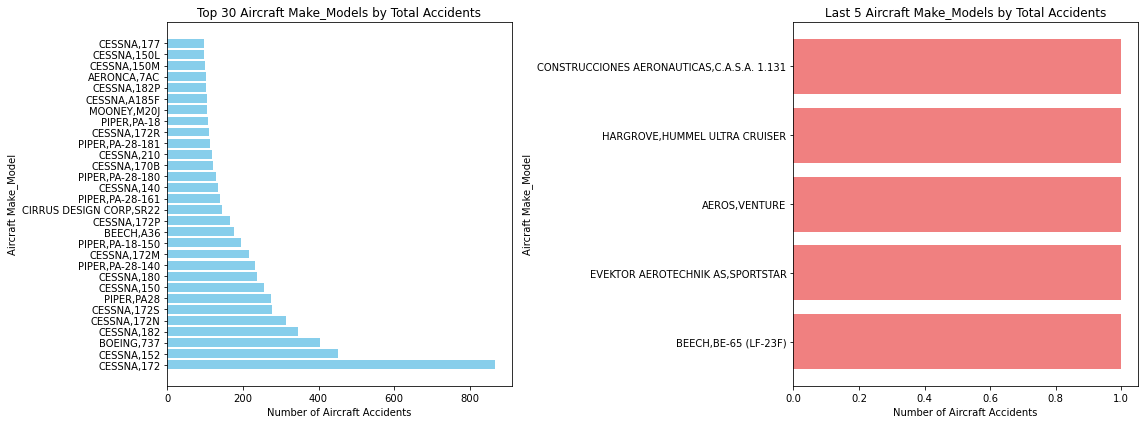

In [ ]:
#Plotting the bar plots 
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,6))

#Creating variables for easier reuse
top_30_counts = Airplane_df['Make_Model'].value_counts().iloc[:30]
bottom_5_counts = Airplane_df['Make_Model'].value_counts().iloc[-5:]

#Plot data using horizontal bar plots
ax1.barh(top_30_counts.index, top_30_counts.values, color = 'skyblue')
ax2.barh(bottom_5_counts.index, bottom_5_counts.values, color = 'lightcoral')

#Appearance
ax1.tick_params(axis = "y", labelsize = 10)
ax2.tick_params(axis = "y", labelsize = 10)
ax1.set_xlabel("Number of Aircraft Accidents")
ax2.set_xlabel("Number of Aircraft Accidents")
ax1.set_ylabel("Aircraft Make_Model")
ax2.set_ylabel("Aircraft Make_Model")
ax1.set_title("Top 30 Aircraft Make_Models by Total Accidents")
ax2.set_title("Last 5 Aircraft Make_Models by Total Accidents")

#Layout and Show plot
plt.tight_layout()
plt.show()

### b.) Aircraft Reliability Over Time
To address the second question:

*How reliable are different aircraft models over time? (**Are certain aircraft models consistently involved in accidents over multiple years?**)*

**Steps**

**1. Trend Analysis of Accidents by Aircraft Model:**
   The first step is to calculate the number of accidents per aircraft model for each year to identify patterns. This helps identify whether certain models show a recurring pattern of accidents or if incidents are isolated events.

**2. Identifying High-Risk vs. Low-Risk Trends:**
   The next step is to determine which aircraft models consistently appear in accident records over multiple years. Additionally, we will highlight models that have shown improved safety by reducing accident occurrences over time.

    

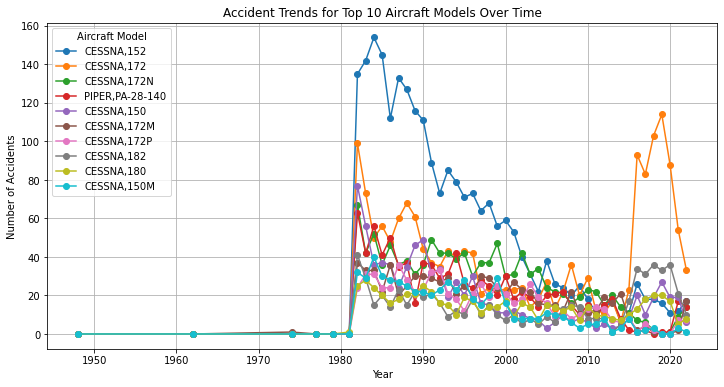

In [ ]:
# Trend Analysis of Accidents by Aircraft Model
df['Year'] = df['Event.Date'].dt.year  # Extract year from event date

# Grouping by Make_Model and Year to count accidents
accidents_per_year = df.groupby(['Make_Model', 'Year']).size().unstack(fill_value=0)

# Plotting trends for the top 10 aircraft models with the most accidents
top_10_models = accidents_per_year.sum(axis=1).nlargest(10).index
accidents_per_year.loc[top_10_models].T.plot(figsize=(12,6), marker='o')
plt.title("Accident Trends for Top 10 Aircraft Models Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title="Aircraft Model")
plt.grid()
plt.show()


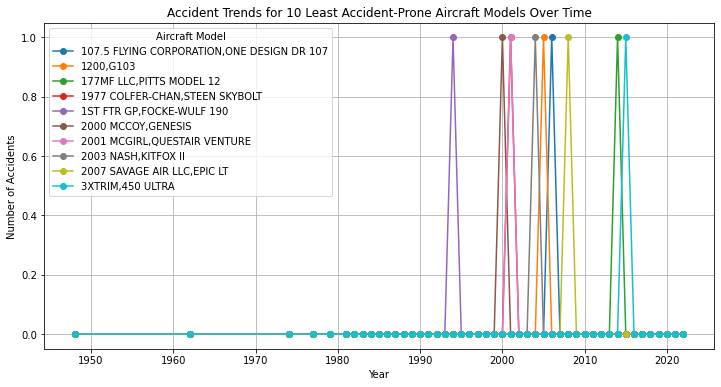

In [30]:
# Trend Analysis for Least Accident-Prone Models
least_10_models = accidents_per_year.sum(axis=1).nsmallest(10).index
accidents_per_year.loc[least_10_models].T.plot(figsize=(12,6), marker='o')

plt.title("Accident Trends for 10 Least Accident-Prone Aircraft Models Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title="Aircraft Model")
plt.grid()
plt.show()

In [26]:
# 2. Identifying High-Risk vs. Low-Risk Trends
# High-risk: Models appearing in accidents for at least 5 different years
high_risk_models = accidents_per_year[accidents_per_year.gt(0).sum(axis=1) >= 5]
print("High-Risk Aircraft Models (Involved in accidents across 5+ years):")
print(high_risk_models.index.tolist())

# Low-risk: Models appearing in accidents for only 1 year
low_risk_models = accidents_per_year[accidents_per_year.gt(0).sum(axis=1) == 1]
print("Low-Risk Aircraft Models (Accidents recorded in only 1 year):")
print(low_risk_models.index.tolist())

High-Risk Aircraft Models (Involved in accidents across 5+ years):
['ADAMS,A55S', 'AERO COMMANDER,100', 'AERO COMMANDER,100-180', 'AERO COMMANDER,112', 'AERO COMMANDER,200D', 'AERO COMMANDER,500', 'AERO COMMANDER,500-B', 'AERO COMMANDER,500B', 'AERO COMMANDER,500S', 'AERO COMMANDER,520', 'AERO COMMANDER,680', 'AERO COMMANDER,680FL', 'AERO COMMANDER,681', 'AERO COMMANDER,685', 'AERO COMMANDER,690', 'AERO COMMANDER,690A', 'AERO COMMANDER,CALLAIR A-9B', 'AERO COMMANDER,S-2R', 'AERO COMMANDER,S2R', 'AERO VODOCHODY AERO. WORKS,L-39C', 'AERONCA,11AC', 'AERONCA,11BC', 'AERONCA,11CC', 'AERONCA,15AC', 'AERONCA,65-C', 'AERONCA,65-CA', 'AERONCA,65-TAC', 'AERONCA,7AC', 'AERONCA,7BCM', 'AERONCA,7CCM', 'AERONCA,7DC', 'AERONCA,7EC', 'AERONCA,O-58B', 'AEROSPATIALE,AS 355F1', 'AEROSPATIALE,AS-350B', 'AEROSPATIALE,AS-350D', 'AEROSPATIALE,AS-355-F1', 'AEROSPATIALE,AS350', 'AEROSPATIALE,AS350B', 'AEROSPATIALE,AS350BA', 'AEROSPATIALE,AS350D', 'AEROSPATIALE,ATR-42-300', 'AEROSPATIALE,ATR-72-212', 'AEROSPATI

## c.) Accident Severity by Model

To answer the question:

*How severe are accidents across different aircraft models?(**Which models have the least severe accidents?**)*

**Steps:**
1. **Categorizing Accident Severity by Aircraft Model:**
   
   The first step is to assess accident severity using the available "Injury.Severity" column. This column  classifies accidents as Fatal, Serious, Minor, or None. We will categorize aircraft models based on these classifications.

2. **Identifying Models with High and Low Severity Accidents:**
   
   To evaluate accident severity per model, we will:

      Determine aircraft models with the highest proportion of fatal accidents (most severe).

      Identify aircraft models with the lowest proportion of fatal accidents (least severe).

      Compare different aircraft models based on the total number of fatal, serious, minor, and uninjured incidents.




In [33]:
# Aggregating injury data per aircraft model
agg_data = Airplane_df.groupby('Make_Model').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
})
agg_data

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make_Model,,,,
"177MF LLC,PITTS MODEL 12",0.0,2.0,0.0,0.0
"2007 SAVAGE AIR LLC,EPIC LT",0.0,0.0,0.0,4.0
"2021FX3 LLC,CCX-2000",0.0,0.0,0.0,4.0
"3XTRIM,450 ULTRA",1.0,0.0,1.0,0.0
"5 RIVERS LLC,SQ-2",0.0,0.0,1.0,1.0
...,...,...,...,...
"ZLIN,Z50",1.0,0.0,0.0,0.0
"ZODIAC,601XL",1.0,0.0,1.0,0.0
"ZUBAIR S KHAN,RAVEN",1.0,0.0,0.0,0.0


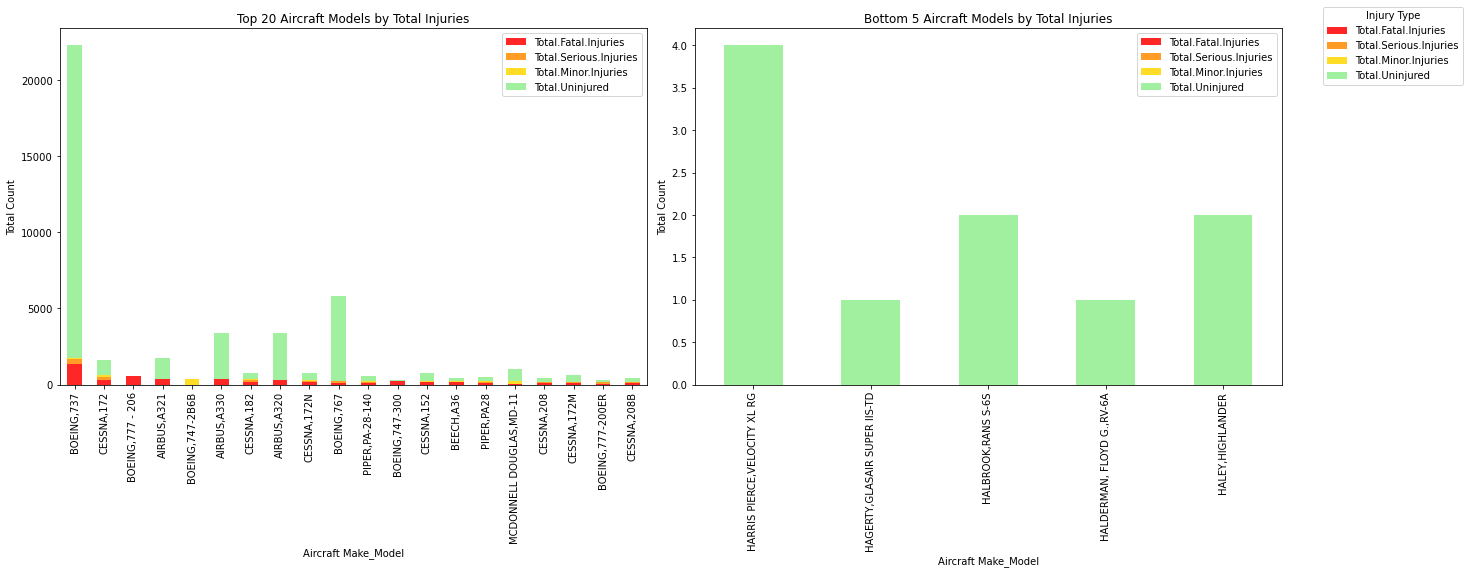

In [34]:
# Calculating total injuries for sorting
agg_data['Total.Injuries'] = agg_data['Total.Fatal.Injuries'] + agg_data['Total.Serious.Injuries'] + agg_data['Total.Minor.Injuries']

# Sorting the data by total injuries
top_20 = agg_data.sort_values(by='Total.Injuries', ascending=False).head(20)
bottom_5 = agg_data.sort_values(by='Total.Injuries', ascending=True).head(5)  # Selecting the bottom 5 explicitly

# Creating the plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

# Top 20 aircraft models with the most injuries
top_20[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].plot(
    kind='bar', stacked=True, ax=ax1, 
    color=['red', 'darkorange', 'gold', 'lightgreen'], alpha=0.85
)
ax1.set_title('Top 20 Aircraft Models by Total Injuries')
ax1.set_ylabel('Total Count')
ax1.set_xlabel('Aircraft Make_Model')
ax1.tick_params(axis="x", labelrotation=90)

# Bottom 5 aircraft models with the least injuries
bottom_5[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].plot(
    kind='bar', stacked=True, ax=ax2, 
    color=['red', 'darkorange', 'gold', 'lightgreen'], alpha=0.85
)
ax2.set_title('Bottom 5 Aircraft Models by Total Injuries')
ax2.set_ylabel('Total Count')
ax2.set_xlabel('Aircraft Make_Model')
ax2.tick_params(axis="x", labelrotation=90)

# Adjusting legend placement
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Injury Type', bbox_to_anchor=(1.02, 1), loc='upper left')

#Layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("cleaned_data.csv", index=False)

## 5. Conclusion
This analysis provides valuable insights into aviation accident trends, enabling the company to make informed decisions about selecting the safest aircraft models for its new aviation division. Based on the findings, three key recommendations emerge:

**1. Selecting Aircraft Models with the Lowest Accident Occurrence**

The analysis reveals that different aircraft models have varying accident rates. To enhance operational safety, the company should prioritize acquiring aircraft models with the lowest accident records.

The top five safest models based on accident frequency include:

- MILLER ROGER, THATCHER CX4

- AVIAT AIRCRAFT INC, HUSKY

- PIPER, J3C-75

- WACO, YMF-3

- DIAMOND AIRCRAFT INDUSTRIES INC, DA 20-C1

**2. Selecting Aircraft Models with the Most Reliable Safety Records Over Time**

The analysis of accident trends over multiple years reveals that some aircraft models consistently experience more accidents, while others demonstrate greater reliability. The key insights include:

Certain models, such as CESSNA_152 and CESSNA_172, show a significant spike in accident occurrences at certain periods, indicating potential operational risks.

Other models, however, maintain relatively lower and stable accident rates over time, making them more suitable for selection.

The safest aircraft models based on historical accident trends include:

- CESSNA_150M

- CESSNA_180

- CESSNA_182

- ZENAIR, CH 2000

- YOUKEY, LANCAIR 235

These models have demonstrated low and stable accident rates over multiple years, making them ideal candidates for the company’s new aviation division. Prioritizing these models can enhance safety and reduce operational risks.

**3. Selecting Aircraft Models with the Lowest Fatalities and Highest Survival Rates**

The safest aircraft models should not only have fewer accidents but also record lower fatality and injury rates. Aircraft that minimize injuries and maximize passenger safety will enhance the company’s reputation and attract customers.

The best aircraft models based on survival rates include:

- GULFSTREAM, GULFSTREAM G150

- GULFSTREAM, GULFSTREAM GVI

- GULFSTREAM, GULFSTREAM150

- GULFSTREAM, GULFSTREAM200

- ZWICKER MURRAY R, GLASTAR

By focusing on these aircraft models and ensuring they are equipped with modern safety features, the company can improve operational efficiency and minimize aviation risks.

## 6. Further Analysis
Additional research can provide deeper insights into accident patterns and aircraft safety, further refining the company's selection strategy. The following areas warrant further investigation:

*1. Predicting Accidents Based on Weather Conditions*

Analyzing how weather variables (e.g., storms, fog, wind speed) influence accident rates could help develop a risk mitigation strategy for different flight conditions.

*2. Modeling Accident Frequency by Location*

Identifying high-risk locations based on accident data can help plan safer routes and avoid accident-prone airspaces.

*3. Assessing the Impact of Aircraft Maintenance on Accident Rates*

Investigating how maintenance frequency and quality affect accident occurrence will allow the company to establish best practices for fleet maintenance.

By conducting these additional analyses, the company can develop a comprehensive risk management strategy and optimize safety standards in its aviation division.